# Creating a Filter, Edge Detection

### Import resources and display image

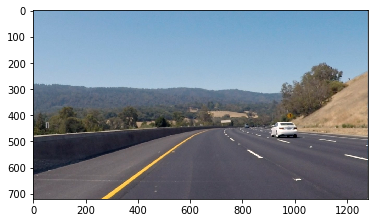

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Imports OpenCV
import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

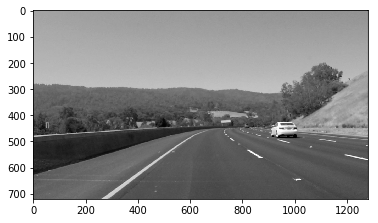

In [2]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

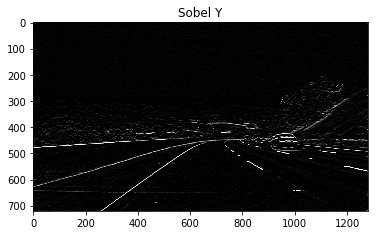

In [3]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                    [  0,  0,  0], 
                    [  1,  2,  1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.title('Sobel Y')
plt.imshow(filtered_image, cmap='gray')

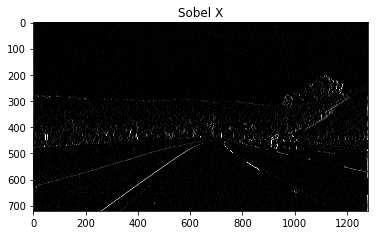

In [4]:
## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# Apply filter
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.title('Sobel X')
plt.imshow(filtered_image, cmap='gray')

What happens if we flip the matrix (i.e. multiply by -1)

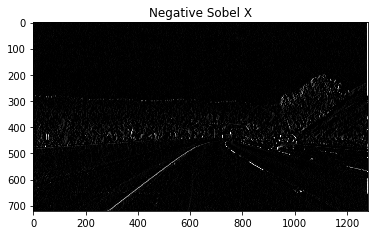

In [5]:
# Apply filter
filtered_image = cv2.filter2D(gray, -1, -1*sobel_x)

plt.title('Negative Sobel X')
plt.imshow(filtered_image, cmap='gray')

Ok, it looks more or less the same.

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



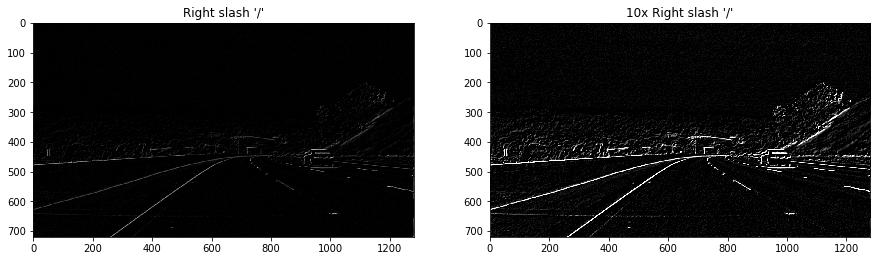

In [6]:
# Creating a filter with a diagonal value, with decimal weights
right_slash = np.array([[-0.2, -0.4,  0],
                        [-0.4,  0,  0.4],
                        [ 0,  0.4,  0.2]])
# Apply filter
filtered_image = cv2.filter2D(gray, -1, right_slash)

fig = plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Right slash \'/\'')
plt.imshow(filtered_image, cmap='gray')

filtered_image = cv2.filter2D(gray, -1, 10*right_slash)

plt.subplot(122)
plt.title('10x Right slash \'/\'')
plt.imshow(filtered_image, cmap='gray')

It looks like the magnitude of the diagonal also matters

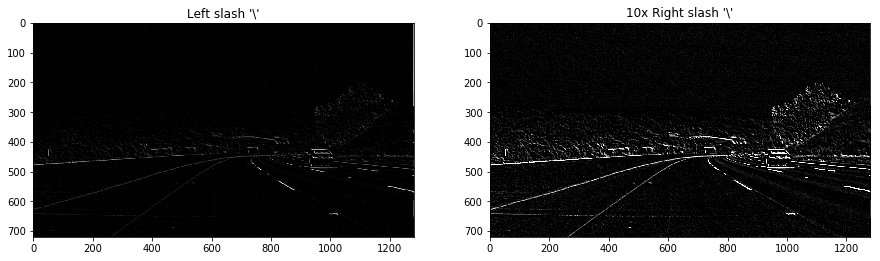

In [7]:
# Creating a filter with a diagonal value, with decimal weights
left_slash = np.array([[0,  -0.4, -0.2],
                       [0.4,  0,  -0.4],
                       [0.2, 0.4,    0]])
# Apply filter
filtered_image = cv2.filter2D(gray, -1, left_slash)

fig = plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Left slash \'\\\'')
plt.imshow(filtered_image, cmap='gray')

filtered_image = cv2.filter2D(gray, -1, 10*left_slash)

plt.subplot(122)
plt.title('10x Right slash \'\\\'')
plt.imshow(filtered_image, cmap='gray')

Let's try now with a larger 5x5 filter

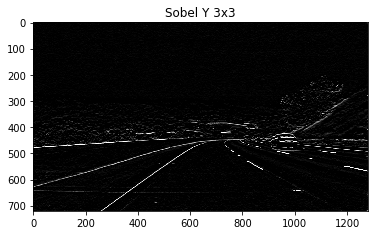

In [8]:
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)
plt.title('Sobel Y 3x3')
plt.imshow(filtered_image, cmap='gray')

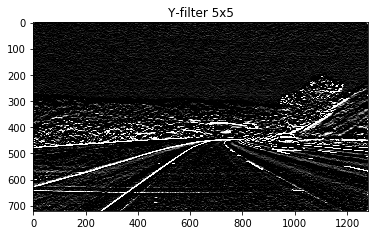

In [9]:
# 5x5 array for edge detection
y_5x5 = np.array([[ -1, -2, -3, -2, -1], 
                  [ -2, -3, -4, -3, -2],
                  [  0,  0,  0,  0,  0],
                  [  2,  3,  4,  3,  2],
                  [  1,  2,  3,  2,  1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, y_5x5)

plt.title('Y-filter 5x5')
plt.imshow(filtered_image, cmap='gray')

I'm seeing a lot more noise in the image and more detail. The increase in noise probably means that the filter is less ideal, since it's extracting less detail from the image.

In [10]:
# What other images are there?
!ls images

bridge_trees_example.jpg  curved_lane.jpg  sobel_ops.png  white_lines.jpg


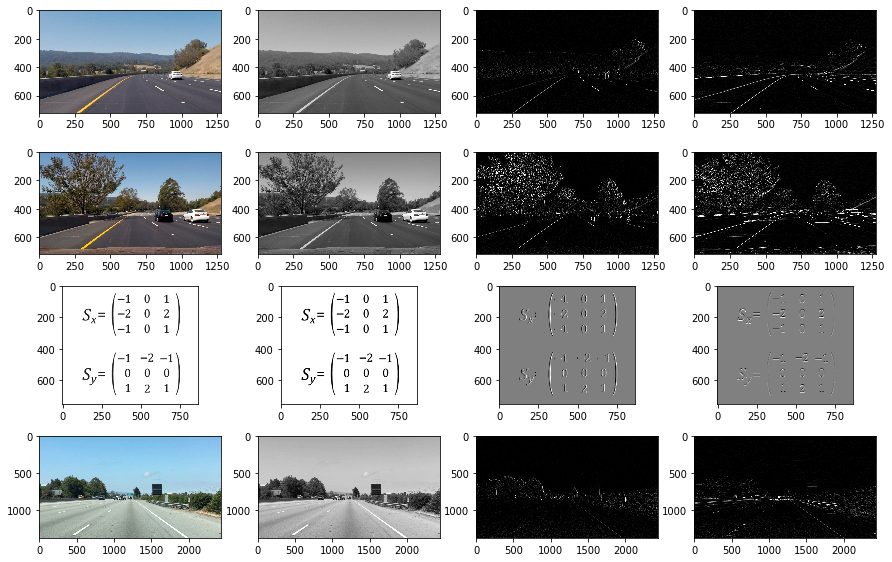

In [13]:
images = []
images.append(mpimg.imread('images/curved_lane.jpg'))
images.append(mpimg.imread('images/bridge_trees_example.jpg'))
images.append(mpimg.imread('images/sobel_ops.png'))
images.append(mpimg.imread('images/white_lines.jpg'))

fig = plt.figure(figsize=(15, 10))

for i in range(len(images)):
    mod = 4*i
    # Plot original
    plt.subplot(4,4,0+mod+1)
    plt.imshow(images[i])
    
    # Gray scale
    gray = cv2.cvtColor(images[i], cv2.COLOR_RGB2GRAY)
    plt.subplot(4,4,0+mod+2)
    plt.imshow(gray, cmap='gray')
    
    # Apply sobel_x
    formatted_img = cv2.filter2D(gray, -1, sobel_x)
    plt.subplot(4,4,0+mod+3)
    plt.imshow(formatted_img, cmap='gray')
    
    # Apply sobel_y
    formatted_img = cv2.filter2D(gray, -1, sobel_y)
    plt.subplot(4,4,0+mod+4)
    plt.imshow(formatted_img, cmap='gray')
    

As expected, the Sobel X filter picks out vertical features (e.g. the the wheels of a car, or the brackets in a matrix) while the Soble Y filter picks out horizontal features (e.g. the bottom of a car or minus signs in the picture of a matrix).